In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Data
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

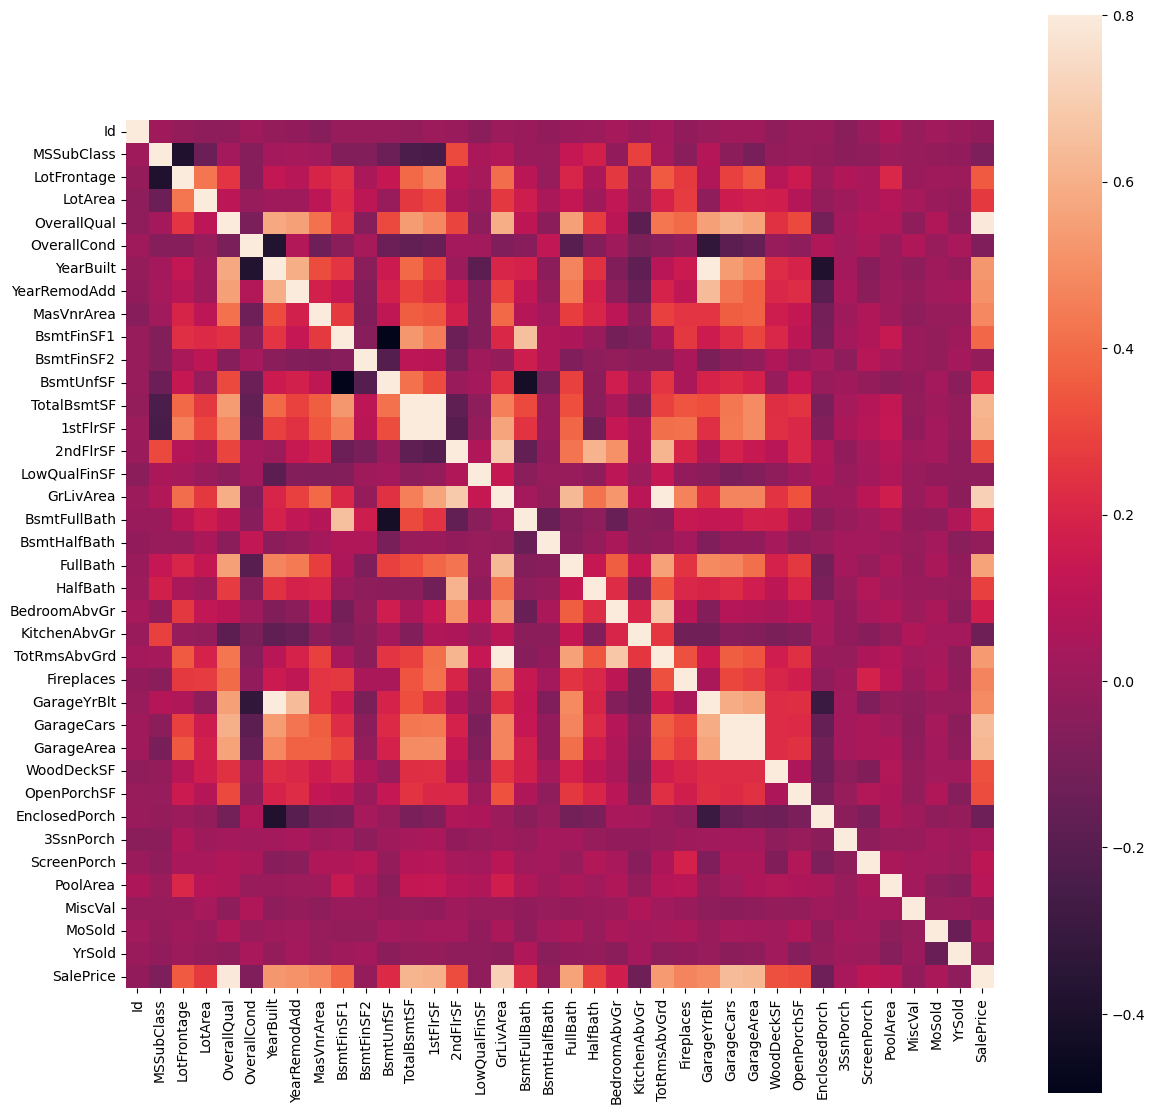

In [5]:
# Correlation Matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
# Missing Values analysis
data_full = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))
missing_values = data_full.isna().sum().sort_values(ascending = False)
missing_values.head(25)


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
dtype: int64

In [7]:
# Columns with more than 1 missing value are dropped
data_full = data_full.dropna(axis = 1, thresh = 2918)
missing_values = data_full.isna().sum().sort_values(ascending = False)
missing_values.head(15)

Electrical      1
BsmtUnfSF       1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
KitchenQual     1
BsmtFinSF2      1
TotalBsmtSF     1
SaleType        1
Exterior1st     1
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [8]:
# Numerical data is filled with mean
data_full = data_full.fillna(data_full.mean())
missing_values = data_full.isna().sum().sort_values(ascending = False)
missing_values.head(15)

C:\Users\jtwai\AppData\Local\Temp\ipykernel_17112\1308173933.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_full = data_full.fillna(data_full.mean())


Electrical      1
SaleType        1
Exterior2nd     1
Exterior1st     1
KitchenQual     1
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [9]:
# Remaining missing values are dropped
data_full = data_full.dropna(axis = 1)
missing_values = data_full.isna().sum().sort_values(ascending = False)
missing_values.head(15)

MSSubClass      0
GarageCars      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      0
HeatingQC       0
PavedDrive      0
dtype: int64

In [10]:
# Dummy variables are created
data_full = pd.get_dummies(data_full)

In [11]:
# Data is separated into training and testing again
X_train = data_full[:train.shape[0]]
X_test = data_full[train.shape[0]:]
# Logarithmic transformation
Y_train = np.log(train['SalePrice'])

In [12]:
# KFold is used for cross validation in order to tune the best hyperparameters to use in our Random Forest Model:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 2023)
kfold

KFold(n_splits=3, random_state=2023, shuffle=True)

In [13]:
# Random Forest model and hyperparameter tuning:

rf = RandomForestRegressor(
    random_state = 2023,
    criterion = 'squared_error',
)

rf_hp = {
    'n_estimators': np.arange(20, 241, 20), 
    'max_features': np.arange(10, 101, 20), 
    'min_samples_split': np.arange(2, 13, 5)
}

rf_model = GridSearchCV(
    estimator = rf,
    param_grid = rf_hp,
    cv = kfold,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    verbose = True
)

rf_model.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=2023, shuffle=True),
             estimator=RandomForestRegressor(random_state=2023), n_jobs=-1,
             param_grid={'max_features': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([ 2,  7, 12]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240])},
             scoring='neg_root_mean_squared_error', verbose=True)

In [14]:
# Best parameters are determined
print('best_params: ', rf_model.best_params_)
print('RMSE: ', rf_model.best_score_)

best_params:  {'max_features': 50, 'min_samples_split': 2, 'n_estimators': 200}
RMSE:  -0.13915403671328627


In [15]:
# We use these parameters for our model:
rf_opt = rf_model.best_estimator_.fit(X_train, Y_train)

In [17]:
# A prediction for house prices using our test data is created
prediction = rf_opt.predict(X_test)